In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from scipy import stats
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

# Problem -1 :Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)

advance_payments: Amount paid by the customer in advance by cash (in 100s)

probability_of_full_payment: Probability of payment done in full by the customer to the bank

current_balance: Balance amount left in the account to make purchases (in 1000s)

credit_limit: Limit of the amount in credit card (10000s)

min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


In [8]:
df_seg=pd.read_csv('bank_marketing_part1_Data.csv')

In [9]:
df_seg.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [10]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


Total 210 data and it has 7 variables. All are having non-null values and data type is also looking good

In [11]:
df_seg.shape

(210, 7)

Confirming missing values:

In [12]:
df_seg.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

There is no missing values 

In [13]:
df_seg.duplicated().sum()

0

There is no duplicate data

In [14]:
df_seg.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


Above is the statistical summary of the data set

# Univariate analysis

Analysis for Spending:

In [15]:
print('Minimum spending is: ' , df_seg['spending'].min())
print('Maximum spending is: ' , df_seg['spending'].max())
print('Standard deviation is: ' , df_seg['spending'].std())
print('Range is: ', df_seg['spending'].max() - df_seg['spending'].min())
print('Average spending is: ',df_seg['spending'].mean())
print('1st Quartile is: ',df_seg['spending'].quantile(q=0.25))
print('3rd Quartile is: ',df_seg['spending'].quantile(q=0.75))
print('IQR is: ',stats.iqr(df_seg['spending']))

Minimum spending is:  10.59
Maximum spending is:  21.18
Standard deviation is:  2.909699430687361
Range is:  10.59
Average spending is:  14.847523809523818
1st Quartile is:  12.27
3rd Quartile is:  17.305
IQR is:  5.035


Checking Outliers and data distribution

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


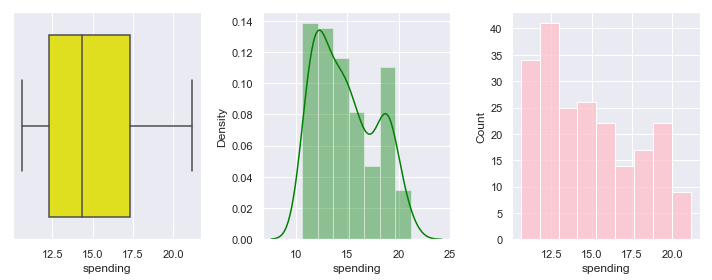

In [16]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='spending',data=df_seg,ax=x1,color='yellow');
sns.distplot(df_seg['spending'],ax=x2,color='green');
sns.histplot(df_seg['spending'],ax=x3,color='pink');
plt.tight_layout()

1.There is no outlier in the dataset

2.Its not normally distributed, littile bit right skewed

Analysis for advance_payments:

In [17]:
print('Minimum advance_payment is: ' , df_seg['advance_payments'].min())
print('Maximum advance_payment is: ' , df_seg['advance_payments'].max())
print('Standard deviation is: ' , df_seg['advance_payments'].std())
print('Range is: ', df_seg['advance_payments'].max() - df_seg['advance_payments'].min())
print('Average advance_payment is: ',df_seg['advance_payments'].mean())
print('1st Quartile is: ',df_seg['advance_payments'].quantile(q=0.25))
print('3rd Quartile is: ',df_seg['advance_payments'].quantile(q=0.75))
print('IQR is: ',stats.iqr(df_seg['advance_payments']))

Minimum advance_payment is:  12.41
Maximum advance_payment is:  17.25
Standard deviation is:  1.305958726564022
Range is:  4.84
Average advance_payment is:  14.559285714285727
1st Quartile is:  13.45
3rd Quartile is:  15.715
IQR is:  2.2650000000000006


Checking Outliers and data distribution

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


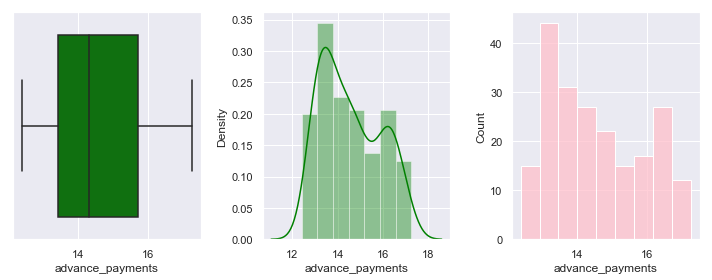

In [19]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='advance_payments',data=df_seg,ax=x1,color='green');
sns.distplot(df_seg['advance_payments'],ax=x2,color='green');
sns.histplot(df_seg['advance_payments'],ax=x3,color='pink');
plt.tight_layout()

1. No outlier in the datas set
2. Data is not completely normally distributed

Analysis of probability_of_full_payment:

In [20]:
print('Minimum probability_of_full_payment is: ' , df_seg['probability_of_full_payment'].min())
print('Maximum advance_payment is: ' , df_seg['probability_of_full_payment'].max())
print('Standard deviation is: ' , df_seg['probability_of_full_payment'].std())
print('Range is: ', df_seg['probability_of_full_payment'].max() - df_seg['probability_of_full_payment'].min())
print('Average probability_of_full_payment is: ',df_seg['probability_of_full_payment'].mean())
print('1st Quartile is: ',df_seg['probability_of_full_payment'].quantile(q=0.25))
print('3rd Quartile is: ',df_seg['probability_of_full_payment'].quantile(q=0.75))
print('IQR is: ',stats.iqr(df_seg['probability_of_full_payment']))

Minimum probability_of_full_payment is:  0.8081
Maximum advance_payment is:  0.9183
Standard deviation is:  0.023629416583846496
Range is:  0.11019999999999996
Average probability_of_full_payment is:  0.8709985714285714
1st Quartile is:  0.8569
3rd Quartile is:  0.887775
IQR is:  0.030874999999999986


Checking Outliers and data distribution

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


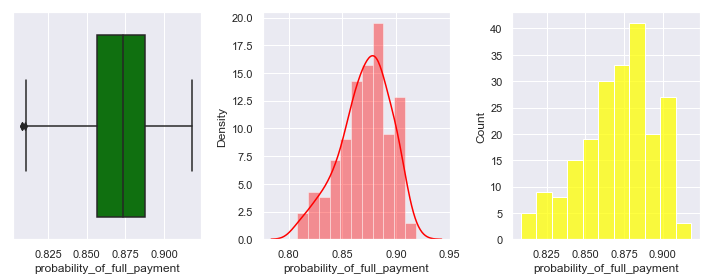

In [21]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='probability_of_full_payment',data=df_seg,ax=x1,color='green');
sns.distplot(df_seg['probability_of_full_payment'],ax=x2,color='red');
sns.histplot(df_seg['probability_of_full_payment'],ax=x3,color='yellow');
plt.tight_layout()

1. There is outlier can be seen which a small one and from lower side

2. data is looking like a little normally distributed but also looking as left skewed

Analysis of current_balance:

In [22]:
print('Minimum current_balance is: ' , df_seg['current_balance'].min())
print('Maximum current_balance is: ' , df_seg['current_balance'].max())
print('Standard deviation is: ' , df_seg['current_balance'].std())
print('Range is: ', df_seg['current_balance'].max() - df_seg['current_balance'].min())
print('Average current_balance is: ',df_seg['current_balance'].mean())
print('1st Quartile is: ',df_seg['current_balance'].quantile(q=0.25))
print('3rd Quartile is: ',df_seg['current_balance'].quantile(q=0.75))
print('IQR is: ',stats.iqr(df_seg['current_balance']))

Minimum current_balance is:  4.899
Maximum current_balance is:  6.675
Standard deviation is:  0.4430634777264493
Range is:  1.7759999999999998
Average current_balance is:  5.628533333333334
1st Quartile is:  5.26225
3rd Quartile is:  5.97975
IQR is:  0.7175000000000002


Checking Outliers and data distribution

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


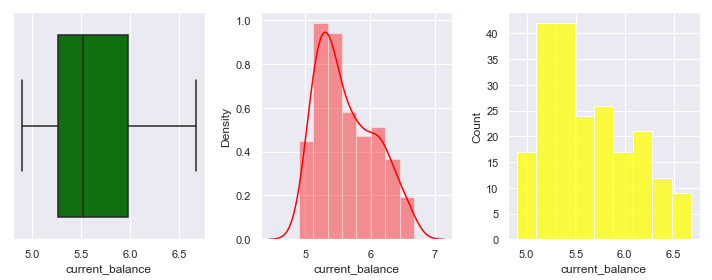

In [23]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='current_balance',data=df_seg,ax=x1,color='green');
sns.distplot(df_seg['current_balance'],ax=x2,color='red');
sns.histplot(df_seg['current_balance'],ax=x3,color='yellow');
plt.tight_layout()

1. No outlier in the data set

2. Data looks little right skewed

Analysis of credit_limit:

In [24]:
print('Minimum credit_limit is: ' , df_seg['credit_limit'].min())
print('Maximum credit_limit is: ' , df_seg['credit_limit'].max())
print('Standard deviation is: ' , df_seg['credit_limit'].std())
print('Range is: ', df_seg['credit_limit'].max() - df_seg['credit_limit'].min())
print('Average credit_limit is: ',df_seg['credit_limit'].mean())
print('1st Quartile is: ',df_seg['credit_limit'].quantile(q=0.25))
print('3rd Quartile is: ',df_seg['credit_limit'].quantile(q=0.75))
print('IQR is: ',stats.iqr(df_seg['credit_limit']))

Minimum credit_limit is:  2.63
Maximum credit_limit is:  4.033
Standard deviation is:  0.3777144449065874
Range is:  1.4030000000000005
Average credit_limit is:  3.258604761904763
1st Quartile is:  2.944
3rd Quartile is:  3.56175
IQR is:  0.61775


Checking outlliers and data distribution

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


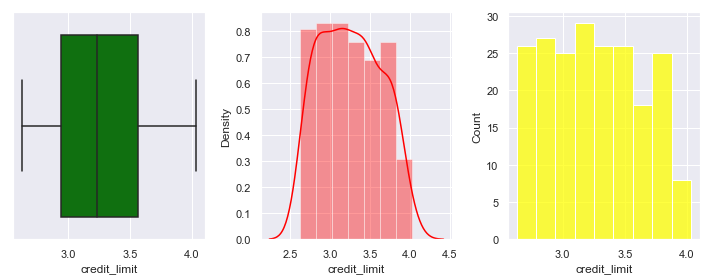

In [25]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='credit_limit',data=df_seg,ax=x1,color='green');
sns.distplot(df_seg['credit_limit'],ax=x2,color='red');
sns.histplot(df_seg['credit_limit'],ax=x3,color='yellow');
plt.tight_layout()

1. There is no outliers

2. Data is normaly distributed

Analysis for min_payment_amt:

In [26]:
print('Minimum min_payment_amt is: ' , df_seg['min_payment_amt'].min())
print('Maximum min_payment_amt is: ' , df_seg['min_payment_amt'].max())
print('Standard deviation is: ' , df_seg['min_payment_amt'].std())
print('Range is: ', df_seg['min_payment_amt'].max() - df_seg['min_payment_amt'].min())
print('Average min_payment_amt is: ',df_seg['min_payment_amt'].mean())
print('1st Quartile is: ',df_seg['min_payment_amt'].quantile(q=0.25))
print('3rd Quartile is: ',df_seg['min_payment_amt'].quantile(q=0.75))
print('IQR is: ',stats.iqr(df_seg['min_payment_amt']))

Minimum min_payment_amt is:  0.7651
Maximum min_payment_amt is:  8.456
Standard deviation is:  1.5035571308217792
Range is:  7.690899999999999
Average min_payment_amt is:  3.7002009523809507
1st Quartile is:  2.5614999999999997
3rd Quartile is:  4.76875
IQR is:  2.20725


Checking outlliers and data distribution

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


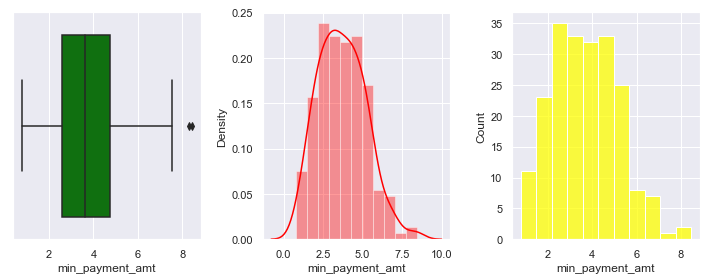

In [27]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='min_payment_amt',data=df_seg,ax=x1,color='green');
sns.distplot(df_seg['min_payment_amt'],ax=x2,color='red');
sns.histplot(df_seg['min_payment_amt'],ax=x3,color='yellow');
plt.tight_layout()

1. There are outliers but less

2. Data is normally distributed

Analysis for max_spent_in_single_shopping:

In [28]:
print('Minimum max_spent_in_single_shopping is: ' , df_seg['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shopping is: ' , df_seg['max_spent_in_single_shopping'].max())
print('Standard deviation is: ' , df_seg['max_spent_in_single_shopping'].std())
print('Range is: ', df_seg['max_spent_in_single_shopping'].max() - df_seg['max_spent_in_single_shopping'].min())
print('Average max_spent_in_single_shopping: ',df_seg['max_spent_in_single_shopping'].mean())
print('1st Quartile is: ',df_seg['max_spent_in_single_shopping'].quantile(q=0.25))
print('3rd Quartile is: ',df_seg['max_spent_in_single_shopping'].quantile(q=0.75))
print('IQR is: ',stats.iqr(df_seg['max_spent_in_single_shopping']))

Minimum max_spent_in_single_shopping is:  4.519
Maximum max_spent_in_single_shopping is:  6.55
Standard deviation is:  0.4914804991024054
Range is:  2.0309999999999997
Average max_spent_in_single_shopping:  5.408071428571429
1st Quartile is:  5.045
3rd Quartile is:  5.877000000000001
IQR is:  0.8320000000000007


Checking outlliers and data distribution

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


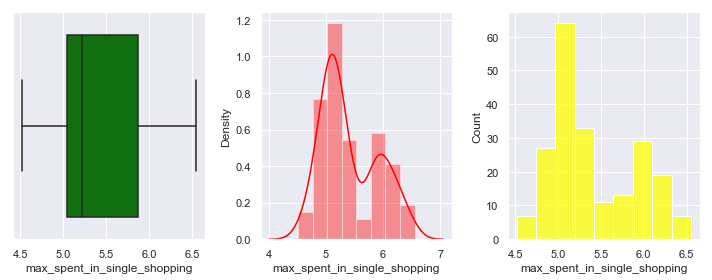

In [29]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='max_spent_in_single_shopping',data=df_seg,ax=x1,color='green');
sns.distplot(df_seg['max_spent_in_single_shopping'],ax=x2,color='red');
sns.histplot(df_seg['max_spent_in_single_shopping'],ax=x3,color='yellow');
plt.tight_layout()

1. There is no outliers in the data

2. Data is not normally distributed

# Bi-variate

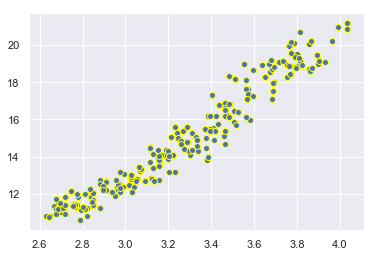

In [30]:
plt.scatter(df_seg['credit_limit'],df_seg['spending'],edgecolors='yellow')

If credit limit increses then spending also increses

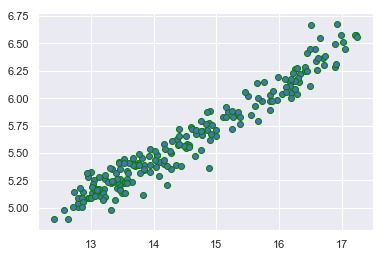

In [31]:
plt.scatter(df_seg['advance_payments'],df_seg['current_balance'],edgecolors='green')

If advance payment done then current balance also increses


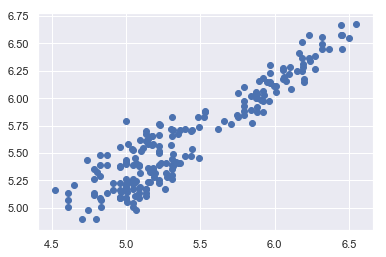

In [32]:
plt.scatter(df_seg['max_spent_in_single_shopping'],df_seg['current_balance'])

# Multivariate

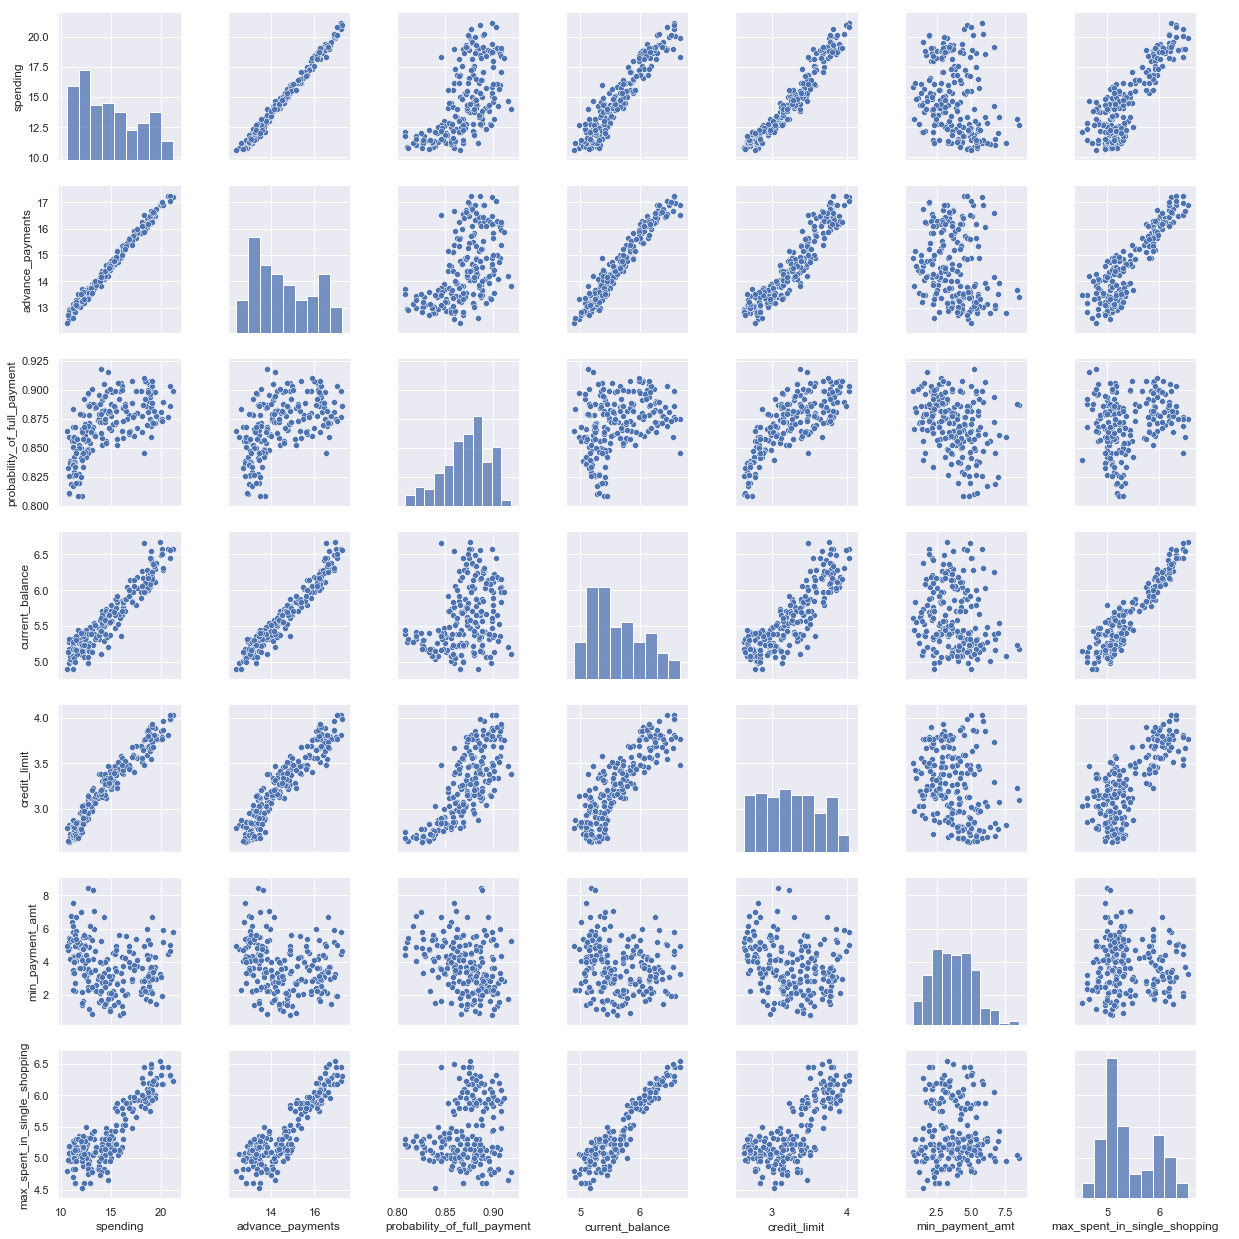

In [33]:
sns.pairplot(df_seg)

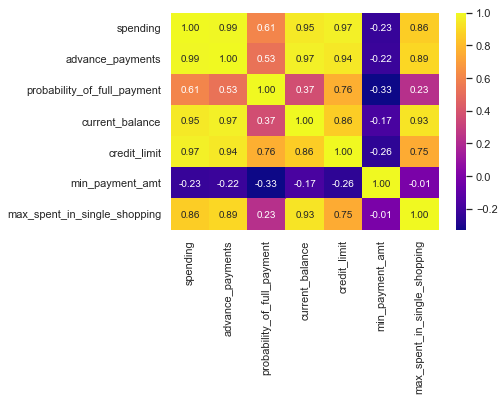

In [34]:
sns.heatmap(df_seg.corr(),annot=True,fmt=".2f",cmap="plasma")

•	A lot of Multi collinearity can be seen between variables. Most of the relationships are above 75% which shows significant relationship.

•	There are many negative correlations as well.

•	There are some relations which falls in 23% range and 37% which shows week correlation.

•	At the same time some are more than 50% so it is having strong relation.

•	Positive correlation count  is more than negative here.


Outlier Treatment:

Detecting the outlier as we need to do Custering so outlier treatment is necessary. Here we are replacing outliers with upper bound and lower bound values as there are very less outlirs so we can use any method to treat outliers

In [35]:
clean_df=df_seg.copy()

Replace outliers using IQR for min_payment_amt

In [36]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(clean_df['min_payment_amt'])
print("lower range",lr, "and upper range", ur)

clean_df['min_payment_amt']=np.where(clean_df['min_payment_amt']>ur,ur,clean_df['min_payment_amt'])
clean_df['min_payment_amt']=np.where(clean_df['min_payment_amt']<lr,lr,clean_df['min_payment_amt'])

lower range -0.7493750000000006 and upper range 8.079625


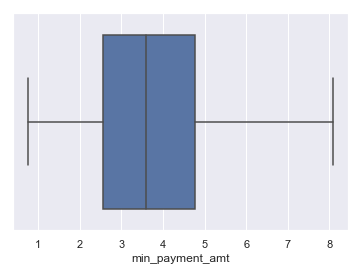

In [37]:
sns.boxplot(x='min_payment_amt',data=clean_df);

Replace outliers using IQR for probability_of_full_payment

In [38]:
final_df=clean_df.copy()

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(final_df['probability_of_full_payment'])
print("lower range",lr, "and upper range", ur)

final_df['probability_of_full_payment']=np.where(final_df['probability_of_full_payment']>ur,ur,final_df['probability_of_full_payment'])
final_df['probability_of_full_payment']=np.where(final_df['probability_of_full_payment']<lr,lr,final_df['probability_of_full_payment'])

lower range 0.8105875 and upper range 0.9340875


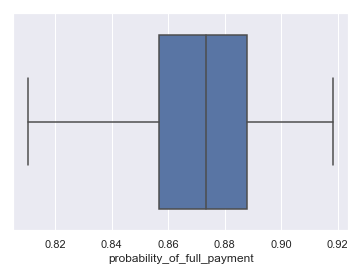

In [40]:
sns.boxplot(x='probability_of_full_payment',data=final_df);

Outliers Treatment is completed,now data looks good

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [41]:
final_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


Scaling is necessary for this dataset as we can see values are very different from each other.

Spending and advance_payments are having higher values 

If we do not do scaling then during cluster higher values will dominant the actual work of clustering which can cause the biased result.


lets check how data looks before scaling:

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


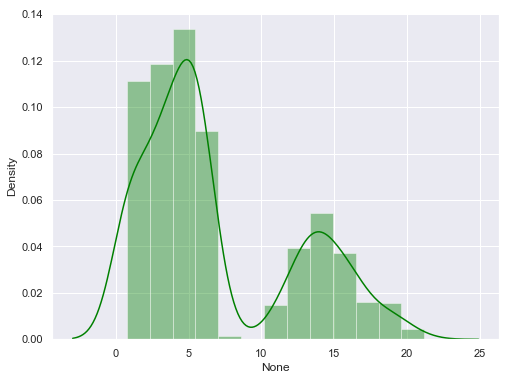

In [42]:
figure(figsize=(8, 6))

sns.distplot(final_df,kde=True,color='Green')

After Scaling:

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


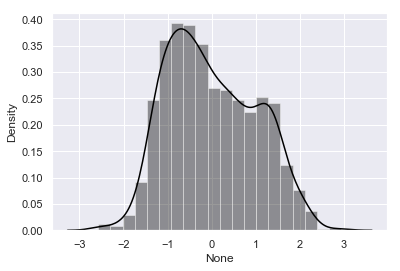

In [43]:
from scipy.stats import zscore
scaled_df=final_df.apply(zscore)
sns.distplot(scaled_df,kde=True,color='Black')
scaled_df.head()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [44]:
from scipy.cluster.hierarchy import dendrogram ,linkage

In [45]:
wardlink= linkage(scaled_df,method='ward')

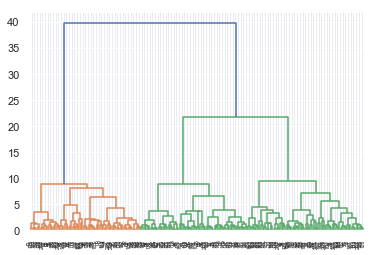

In [46]:
dend= dendrogram(wardlink)

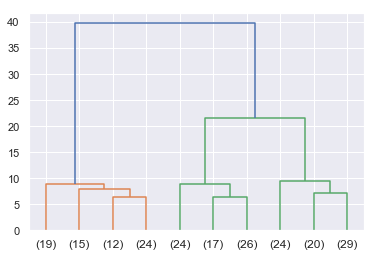

In [47]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [48]:
from scipy.cluster.hierarchy import fcluster

In [49]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [50]:
H_df=df_seg.copy()

In [51]:
H_df['clusters'] = clusters

In [52]:
H_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [53]:
H_df['clusters'].value_counts().sort_values(ascending=False)

3    73
1    70
2    67
Name: clusters, dtype: int64

•	As per the dendrogram can choose to have 3 cluster because three group cluster solution gives a pattern based on high, medium and low spending which we can categorize for further analysis. 

•	3 clusters divides the cells into much more homogenous groups then 2 groups. This is another reason that picking 3 cluster is the best solution so far. 


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [54]:
from sklearn.cluster import KMeans 

In [55]:
k_means = KMeans(n_clusters = 2)

In [56]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [57]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [58]:
k_means.inertia_

659.1474009548498

In [59]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.298481751223

In [60]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

370.8685962394206

In [61]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [62]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

326.00958063858593

In [63]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

289.6255628974343

In [64]:
wss=[]

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [65]:
print('inertia of clusters is as below')
wss

inertia of clusters is as below


[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 370.8685962394206,
 327.6703838206182,
 289.53506501275143,
 262.62831664791327,
 239.97630677108796,
 223.4679802398939,
 206.64742592423787]

Text(0.5,1,'Elbow Curve')

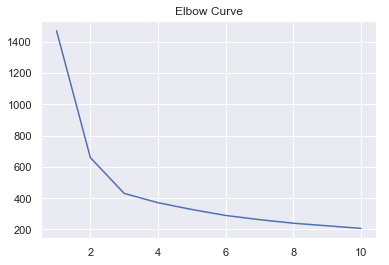

In [66]:
plt.plot(range(1,11), wss)
plt.title('Elbow Curve')

In [67]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [68]:
K_cluster=df_seg.copy()

In [69]:
K_cluster["Clus_kmeans"] = labels
K_cluster.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [70]:
K_cluster['Clus_kmeans'].value_counts().sort_values(ascending=False)

0    72
2    71
1    67
Name: Clus_kmeans, dtype: int64

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [72]:
silhouette_score(scaled_df,labels)

0.4008059221522216

In [73]:
sil_width = silhouette_samples(scaled_df,labels)

In [74]:
sil_df=df_seg.copy()

In [75]:
sil_df["sil_width"] = sil_width
sil_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0.573278
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0.365564
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0.637092
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0.515595
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0.360972


In [76]:
silhouette_samples(scaled_df,labels).min()

0.002768541128616533

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [77]:
Hierch_mean_cluster = pd.DataFrame(round(H_df.groupby('clusters').mean(),1))
Hierch_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.4,16.1,0.9,6.2,3.7,3.6,6.0
2,11.9,13.3,0.8,5.2,2.8,4.9,5.1
3,14.2,14.2,0.9,5.5,3.2,2.6,5.1


In [78]:
K_mean_cluster = pd.DataFrame(round(K_cluster.groupby('Clus_kmeans').mean(),1))
K_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Clus_kmeans,,,,,,,
0,11.9,13.2,0.8,5.2,2.8,4.7,5.1
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,14.4,14.3,0.9,5.5,3.3,2.7,5.1


Inference:

•	From the above clusters we can easily identify 3 different groups. Low spending, Medium spending, and High spending. 

•	If spending is high can see all other attributes are also high except min_payment_amt.

•	Min_payment_amt is high in lower spending category people in compare to others. 

•	max_spent_in_single_shopping is equal among lower and medium level people.

•	Probability_of_full_payment is equal among medium and high spending.

Promotional strategies for each cluster:

High Spending Group (0 cluster for K-means and 1 for Hierarchical)

- Increase credit limit
- Can give more reward points
- As spendig is high so can provide more offer or discount
- Analyze which items they are spending more and give offers on those mostly.

Medium Spending Group (2 cluster for K-means and 3 for Hierarchical)

- Can try increasing credit limits 
- Send them more advertisemnts on email or on phone and keep them posted 
- For excite, give them discounts on movie ticket, hotels and brand purchases.

Low Spending Group (1 cluster for K-means and 2 for Hierarchical)

- Analyze on which items they are spending and give offer on those perticular items more
- Remind them for early payments


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Dataset for Problem 2: insurance_part2_data-1.csv

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount wort of salesper customer in procuring tour insurance policies in ruppees (in 100's)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10. Age of insured (Age)

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [79]:
df_ins=pd.read_csv('insurance_part2_data.csv')

In [80]:
df_ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [81]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [82]:
df_ins.shape

(3000, 10)

In [83]:
df_ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [84]:

df_ins.duplicated().sum()


139

Its showing 139 duplicate data. Ideally as there are no customer Id present so not sure if the duplicate data is for same customer or for different customer. Also, a travel company can provide same tour package to similar demography as well, it is not mandatory to be different. So, I am not deleting the data which is looking like duplicate as Unique id is not present for identification.

Note: Ideally, if duplicate value is less than 3% of the original data, we can blindly delete the duplicate. But here it is 4%. There is a chance of losing 139 record. In real time in such scenario can contact business for better understanding if can be consider as non-duplicate or duplicate data and can take action accordingly after business confirmation.
Here further analysis is done without deleting the duplicate data.


In [85]:
df_ins.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


For better understanding of patterns we will do Uni-variate, Bi-variate and Multi-Variate analysis

# Uni-Variate Analysis

Age:

In [86]:
print('Minimun age from the dataset is: ', df_ins['Age'].min())
print('Maximum age from the dataset is: ',df_ins['Age'].max())
print('Range is: ', df_ins['Age'].max() - df_ins['Age'].min())
print('Average age is: ',df_ins['Age'].mean())
print('Standard deviation is: ',df_ins['Age'].std())
print('1st quartile: ',df_ins['Age'].quantile(q=0.25))
print('3rd quartile: ',df_ins['Age'].quantile(q=0.75))
print('IQR: ',stats.iqr(df_ins['Age']))

Minimun age from the dataset is:  8
Maximum age from the dataset is:  84
Range is:  76
Average age is:  38.091
Standard deviation is:  10.463518245377944
1st quartile:  32.0
3rd quartile:  42.0
IQR:  10.0


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


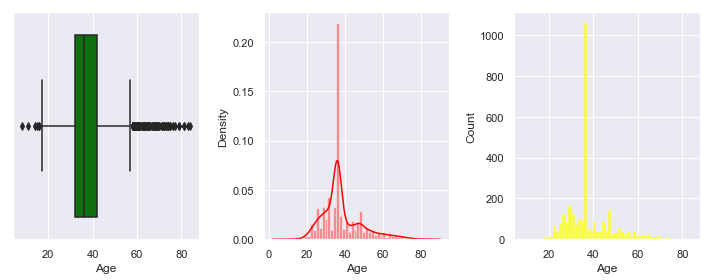

In [87]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='Age',data=df_ins,ax=x1,color='green');
sns.distplot(df_ins['Age'],ax=x2,color='red');
sns.histplot(df_ins['Age'],ax=x3,color='yellow');
plt.tight_layout()

Too many outliers

And not normally distributed because due to outlier the middle portion of the distribution is extremly lengthen

Commision:

In [88]:
print('Minimun Commision from the dataset is: ', df_ins['Commision'].min())
print('Maximum Commision from the dataset is: ',df_ins['Commision'].max())
print('Range is: ', df_ins['Commision'].max() - df_ins['Commision'].min())
print('Average Commision is: ',df_ins['Commision'].mean())
print('Standard deviation is: ',df_ins['Commision'].std())
print('1st quartile: ',df_ins['Commision'].quantile(q=0.25))
print('3rd quartile: ',df_ins['Commision'].quantile(q=0.75))
print('IQR: ',stats.iqr(df_ins['Commision']))

Minimun Commision from the dataset is:  0.0
Maximum Commision from the dataset is:  210.21
Range is:  210.21
Average Commision is:  14.529203333333266
Standard deviation is:  25.48145450662553
1st quartile:  0.0
3rd quartile:  17.235
IQR:  17.235


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


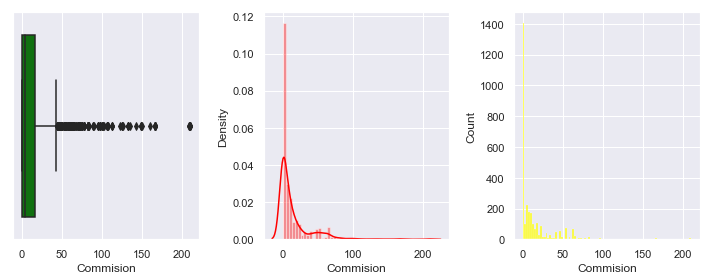

In [89]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(x='Commision',data=df_ins,ax=x1,color='green');
sns.distplot(df_ins['Commision'],ax=x2,color='red');
sns.histplot(df_ins['Commision'],ax=x3,color='yellow');
plt.tight_layout()

Too many outliers

Data is right skewed

Duration:

In [90]:
print('Minimun Duration is: ', df_ins['Duration'].min())
print('Maximum Duration is: ',df_ins['Duration'].max())
print('Range is: ', df_ins['Duration'].max() - df_ins['Duration'].min())
print('Average Duration is: ',df_ins['Duration'].mean())
print('Standard deviation is: ',df_ins['Duration'].std())
print('1st quartile: ',df_ins['Duration'].quantile(q=0.25))
print('3rd quartile: ',df_ins['Duration'].quantile(q=0.75))
print('IQR: ',stats.iqr(df_ins['Duration']))

Minimun Duration is:  -1
Maximum Duration is:  4580
Range is:  4581
Average Duration is:  70.00133333333333
Standard deviation is:  134.05331313253495
1st quartile:  11.0
3rd quartile:  63.0
IQR:  52.0


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


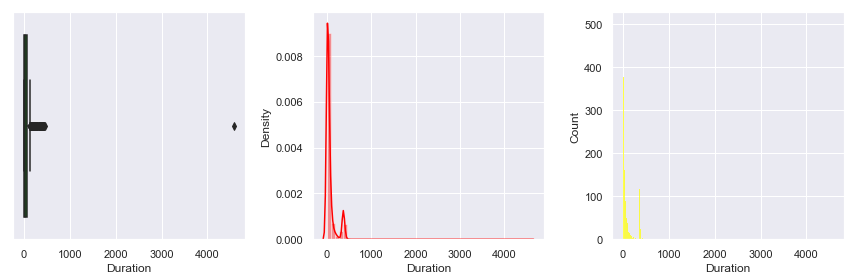

In [91]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x='Duration',data=df_ins,ax=x1,color='green');
sns.distplot(df_ins['Duration'],ax=x2,color='red');
sns.histplot(df_ins['Duration'],ax=x3,color='yellow');
plt.tight_layout()

Minimum duration is -1. Which looks like an anomaly (How no of visiting days will be in negative number).

In real time for this scnenerio can check with business if there is any particular reason for this kind of data or this is actually an anomaly and take decision as well based on that whether can treat or leave as it is.

There is outliers and data is right skewed

Sales:

In [92]:
print('Minimun Sales from the dataset is: ', df_ins['Sales'].min())
print('Maximum Sales from the dataset is: ',df_ins['Sales'].max())
print('Range is: ', df_ins['Sales'].max() - df_ins['Sales'].min())
print('Average Duration is: ',df_ins['Sales'].mean())
print('Standard deviation is: ',df_ins['Sales'].std())
print('1st quartile: ',df_ins['Sales'].quantile(q=0.25))
print('3rd quartile: ',df_ins['Sales'].quantile(q=0.75))
print('IQR: ',stats.iqr(df_ins['Sales']))

Minimun Sales from the dataset is:  0.0
Maximum Sales from the dataset is:  539.0
Range is:  539.0
Average Duration is:  60.24991333333344
Standard deviation is:  70.73395353143047
1st quartile:  20.0
3rd quartile:  69.0
IQR:  49.0


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


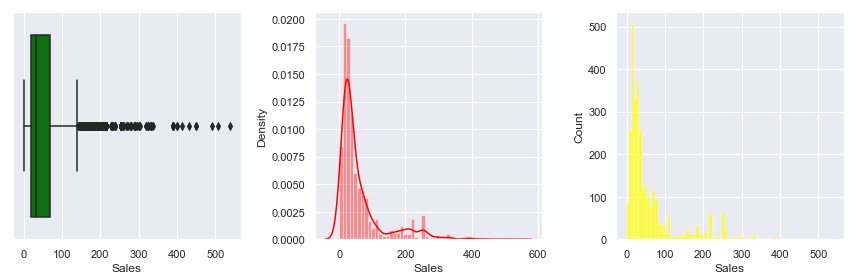

In [93]:
fig, (x1,x2,x3)=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x='Sales',data=df_ins,ax=x1,color='green');
sns.distplot(df_ins['Sales'],ax=x2,color='red');
sns.histplot(df_ins['Sales'],ax=x3,color='yellow');
plt.tight_layout()

There is a lot more outliers in this field

Data is right skewed

Categorical values:

Agency_Code

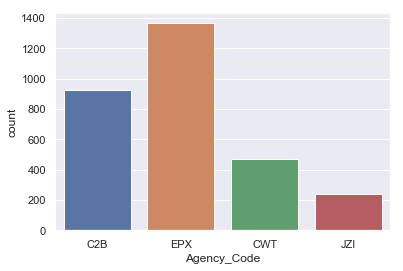

In [96]:
sns.countplot(data=df_ins,x='Agency_Code');

Total 4 Agency code and EPX is having higest amount of usage, at the same time JZI is the lowest

Type:

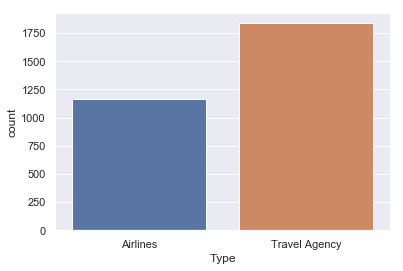

In [98]:
sns.countplot(data=df_ins,x='Type')

It seems Travel Agency is more popular

Claimed:

In [99]:
df_ins['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

Channel:

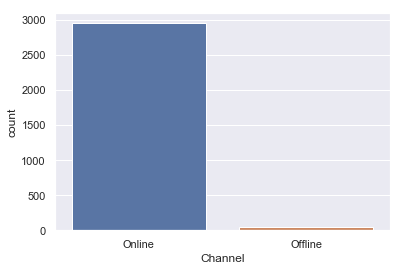

In [101]:
sns.countplot(data=df_ins,x=df_ins['Channel'])

Online distribution channel of tour agency is more popular in compare to offline, infact there is a huge difference. Seems like offline
is very very rare

Product Name:

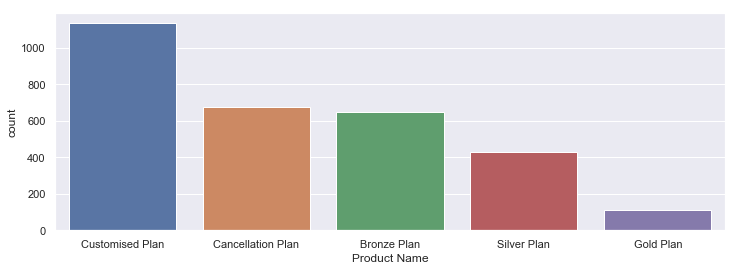

In [102]:
fig=figure(figsize=(12,4))

sns.countplot(data=df_ins,x='Product Name')

It seems Customised plan is more popular and Gold plan is the lowest one

Destination:

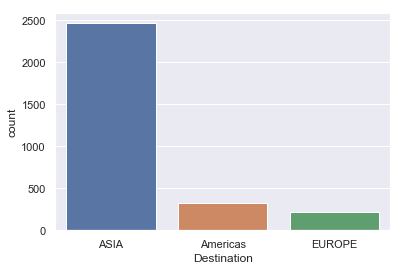

In [103]:
sns.countplot(data=df_ins,x='Destination')

Asian countries seems to be more popular as destination and Europe is least refered (Could be because of expanses)

# Bi-Variate Analysis

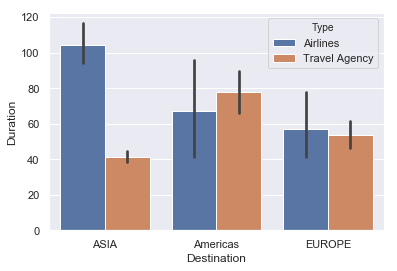

In [104]:
sns.barplot(data=df_ins,x='Destination',y='Duration',hue='Type')

1. Based on destination no of duration is also changes, like Asian destination places seems to have more visting days and Europe is having less

2. For Asian trips, Airlines is more popular and for Americal destinations Travel Agency is more popular

3. Europe is having little difference between airlines and travel agency

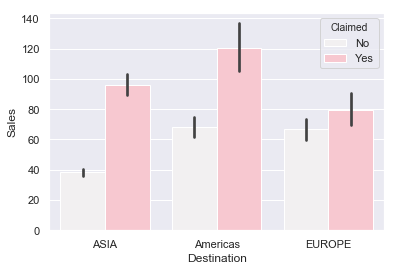

In [105]:
sns.barplot(data=df_ins,x='Destination',y='Sales',hue='Claimed',color='pink')

American destination is having more sale and also more people claimed for this.

Europe is having less sale might because less people have claimed

It means the more claimed the more sale.

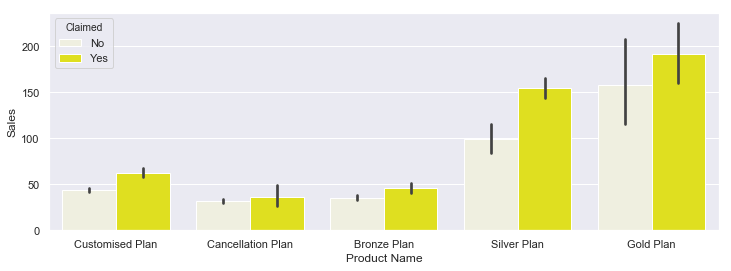

In [106]:
fig=figure(figsize=(12,4))
sns.barplot(data=df_ins,x='Product Name',y='Sales',hue='Claimed',color='yellow');

Gold plan is having higest sales and claiming is also high

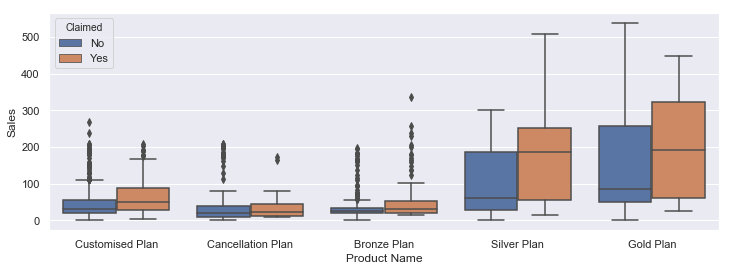

In [107]:
fig=figure(figsize=(12,4))
sns.boxplot(data = df_ins, x='Product Name',y='Sales', hue='Claimed')

•	Gold and silver plan does not have any outliers.

•	Highest outliers can be seen for Bronze plan where people have claimed.

•	Lowest outlier is where people claimed for cancellation.


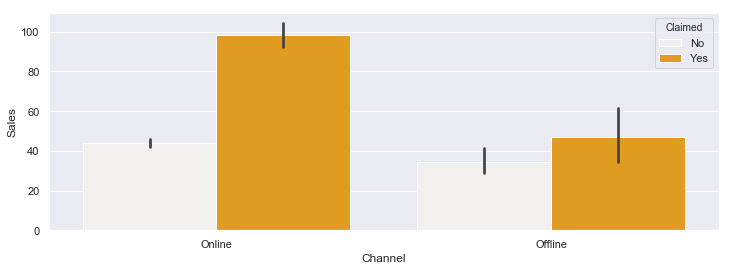

In [108]:
fig=figure(figsize=(12,4))
sns.barplot(data=df_ins,x='Channel',y='Sales',hue='Claimed',color='orange');

Online is more popular also it is having higest Sales and claiming is also high in compare to offline activities

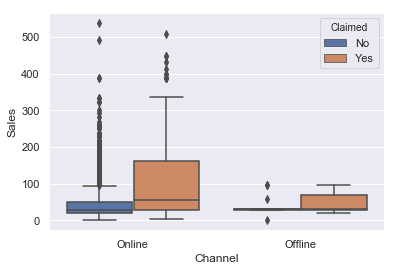

In [109]:
sns.boxplot(data = df_ins, x='Channel',y='Sales', hue='Claimed')

•	For offline claiming there is no outlier but in offline where people have not claimed is having outlier both from lower and upper side of sales.

•	People who claimed online does have also outlier. At the same time people who have not claimed for online seems to have more outliers in sale.


# Multi-Variate Analysis

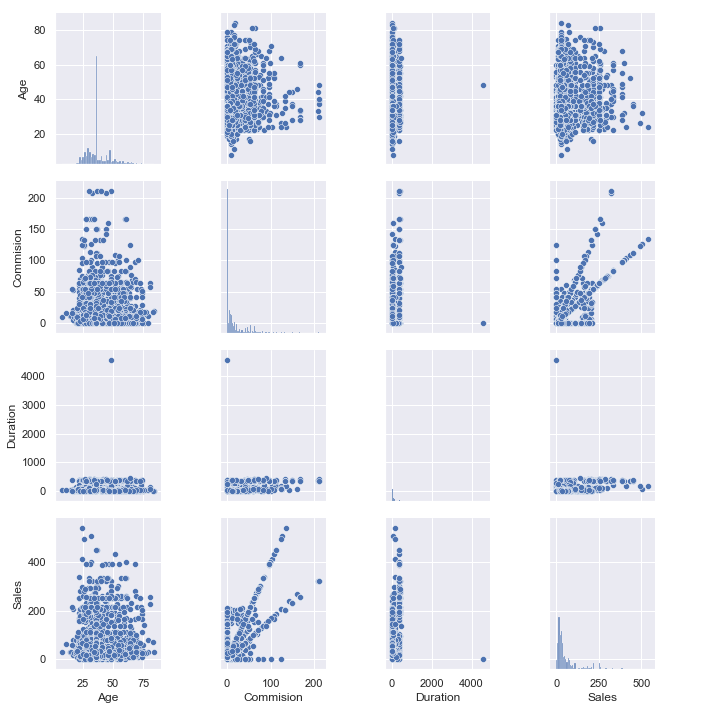

In [110]:
sns.pairplot(df_ins[['Age', 'Commision','Duration', 'Sales']])

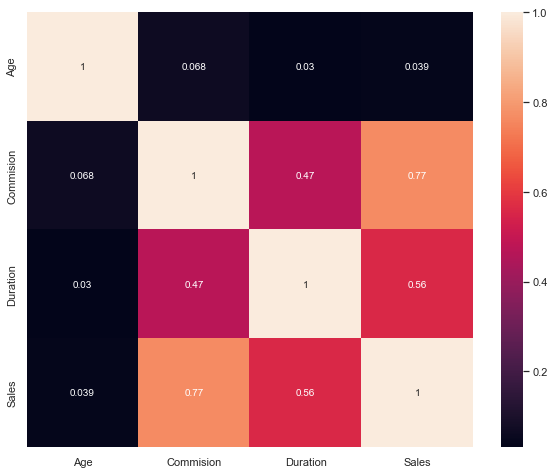

In [111]:
plt.figure(figsize=(10,8))
sns.heatmap(df_ins[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True)

•	The highest relationship is in between Sales and Commission which is 77% which shows a significant relation.

•	Relation of Duration and Age, Sales and Age, Commission and Age are just 0.03 or 0.039 or 0.068 which shows insignificant relationship.

•	Duration and commission is having weak relation as it in in 40% range.

•	At the same time Duration and Sales is more than 50% so it is having strong relation.

•	There is no negative correlation, all are positive.


Convert features from object to int:

In [112]:
for feature in df_ins.columns: 
    if df_ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_ins[feature].unique()))
        print(pd.Categorical(df_ins[feature].unique()).codes)
        df_ins[feature] = pd.Categorical(df_ins[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [113]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [114]:
df_ins['Claimed'].value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

Here data is some what balanced to build a model.To make it 50/50 we need to apply different condition.

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [115]:
df_ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [116]:
X=df_ins.drop('Claimed',axis=1)
y=df_ins.pop('Claimed')

In [117]:
X_train,X_test,train_lables,test_labels=train_test_split(X,y,test_size=.30,random_state=1)

In [118]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_lables',train_lables.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_lables (2100,)
test_labels (900,)


# Decision Tree

In [119]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,12,13,14,15], #Maximum depth of the tree: as per industry standard 10-15
    'min_samples_leaf': [50,100,150], #Minmum no of observations we can have in the leaf node : min sample split/3
    'min_samples_split': [100,150,300,450] #minimum no of sample 2%-3%. but my preference is above 100,otherwise the tree becomes large
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dt_model = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10,scoring='recall')
#CV=10 means model devided train dataset into 10 parts
#Accuracy is average of all accuracy of 10 

In [120]:
grid_search_dt_model.fit(X_train,train_lables)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'],
                         'max_depth': [10, 12, 13, 14, 15],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [100, 150, 300, 450]},
             scoring='recall')

In [121]:
grid_search_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 300}

In [122]:
best_grid_dt = grid_search_dt_model.best_estimator_
print(best_grid_dt)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)


In [123]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('C:\\Users\\jpradhan\\Downloads\\Cart\\Insurance_Tree.dot','w')
dot_data = tree.export_graphviz(best_grid_dt , out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

              Important
Agency_Code    0.631770
Sales          0.261780
Product Name   0.058290
Age            0.017853
Duration       0.016946
Commision      0.013361
Type           0.000000
Channel        0.000000
Destination    0.000000


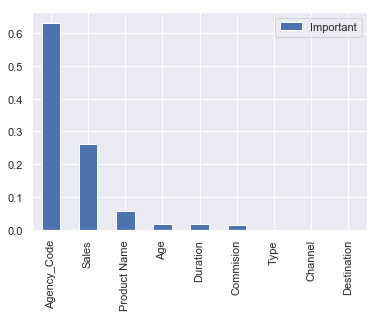

In [124]:
pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False))

•	The most important variable here is Agency-code and no important is Destination, type and channel

In [125]:
#Prediction on train and test dataset
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

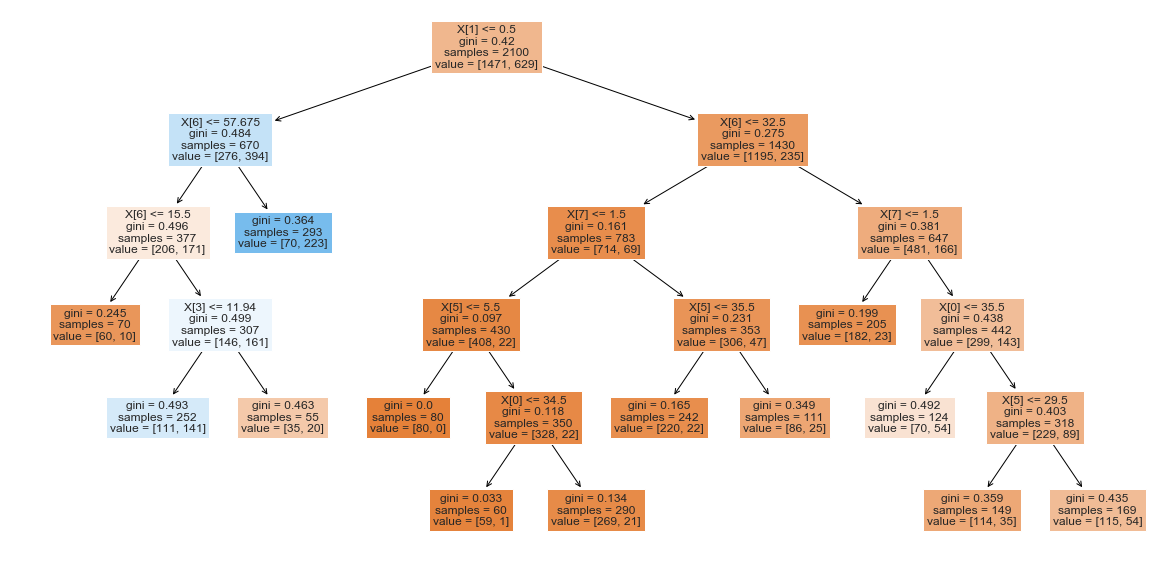

In [126]:
fig, ax = plt.subplots(figsize=(20, 10))
out=tree.plot_tree(best_grid_dt,filled=True,fontsize=12);
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

# Random Forest

In [127]:
param_grid_rfcl = {
    'max_depth': [8,10,12,15], #Ideally 10-15 as per industry standard, But can change based on analysis
    'max_features': [3,4,5],  #Range between Square root of 9(no of independent variable) to 50% of independent variable)
    'min_samples_leaf': [8], #min_samples_split/3 but can change as per performance analysis
    'min_samples_split': [46], #Ideally 2%-3% of the data but again can decide based on random analysis
    'n_estimators': [101] #n_estimator should not alwyas be more than 100 range,otherwise unnecessary it will increase the process 
    #And alwyas take a odd number so that it will overcome the problem of if both 0 and 1 is having similar count, which value model will choose as final number
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [128]:
grid_search_rfcl.fit(X_train,train_lables)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [8, 10, 12, 15],
                         'max_features': [3, 4, 5], 'min_samples_leaf': [8],
                         'min_samples_split': [46], 'n_estimators': [101]})

In [129]:
grid_search_rfcl.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 46,
 'n_estimators': 101}

In [130]:
best_grid_rfcl=grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=101, random_state=1)

              Important
Agency_Code    0.292016
Sales          0.179872
Product Name   0.175663
Commision      0.134348
Duration       0.087985
Age            0.061353
Type           0.056218
Destination    0.011645
Channel        0.000900


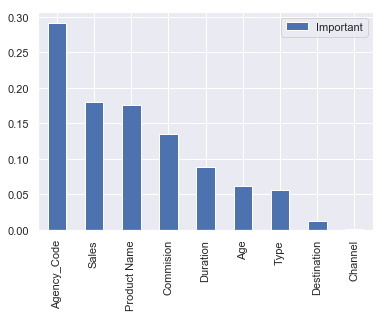

In [131]:
pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False))

In [132]:
#Prediction on train and test dataset
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

# Artificial Neural Network:

In [153]:
#Scale the data using standard scaler
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_trains=sc.fit_transform(X_train)
X_tests=sc.transform(X_test)
#we will fit the train data so that the model will learn mean and variance of the features and these learned parameters will use to scale test dataset

In [155]:
X_trains

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [157]:
X_tests

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [158]:
parm_grid_ann={
    'hidden_layer_sizes': [5],  #(input+output)/2 = (9+1)/2 (no of neurons=hidden layer size)
     'activation': ['logistic', 'relu'],
    'max_iter': [2500],  #how many times model will do back propagation(Epoch)
    'solver': ['adam','sgd'], 
    'tol': [0.001,0.0001], #ETA (Learning rate)  
}

ann=MLPClassifier(random_state=1)

grid_search_ann = GridSearchCV(estimator = ann, param_grid = parm_grid_ann, cv = 5)

In [159]:
grid_search_ann.fit(X_trains,train_lables)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [5], 'max_iter': [2500],
                         'solver': ['adam', 'sgd'], 'tol': [0.001, 0.0001]})

In [160]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 5,
 'max_iter': 2500,
 'solver': 'adam',
 'tol': 0.0001}

In [161]:
best_grid_ann=grid_search_ann.best_estimator_
best_grid_ann

MLPClassifier(hidden_layer_sizes=5, max_iter=2500, random_state=1)

In [162]:
ytrain_predict_ann=best_grid_ann.predict(X_trains)
ytest_predict_ann=best_grid_ann.predict(X_tests)

# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

# CART

AUC AND ROC (Performance)

Training data:

AUC: 0.825


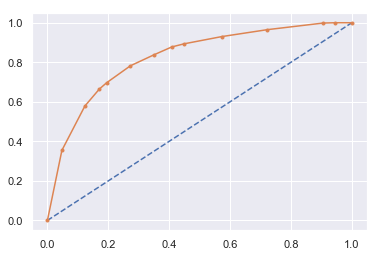

In [164]:
#probability of train data
probs=best_grid_dt.predict_proba(X_train)
#probabilities for positive outcome
probs=probs[:,1]
#calculate AUC
auc = roc_auc_score(train_lables, probs)
print('AUC: %.3f' % auc)
#calculate roc curve
dt_tr_fpr,dt_tr_tpr,dt_tr_thersholds=roc_curve(train_lables, probs)
plt.plot([0,1],[0,1],linestyle='--');
#plot the ROC curve
plt.plot(dt_tr_fpr,dt_tr_tpr,marker='.');

Testing data:

AUC: 0.792


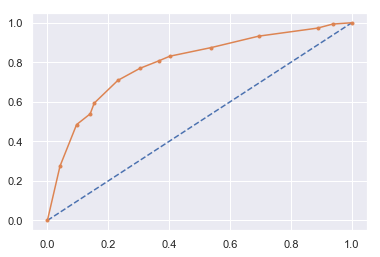

In [165]:
#probability of test data
probs=best_grid_dt.predict_proba(X_test)
#probabilities for positive outcome
probs=probs[:,1]
#calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
#calculate roc curve
dt_te_fpr,dt_te_tpr,dt_te_thersholds=roc_curve(test_labels, probs)
plt.plot([0,1],[0,1],linestyle='--');
#plot the ROC curve
plt.plot(dt_te_fpr,dt_te_tpr,marker='.');


Confusion matrix ,classification report and Accuracy

Training data:

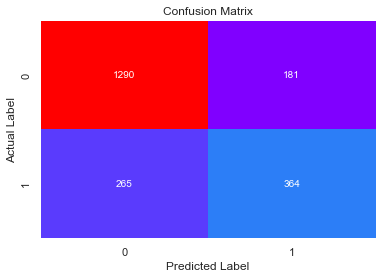

In [166]:
confusion_matrix(train_lables,ytrain_predict_dt)
sns.heatmap(confusion_matrix(train_lables,ytrain_predict_dt),annot=True,fmt='d',cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

In [167]:
cart_train_accuracy=best_grid_dt.score(X_train,train_lables)
print(cart_train_accuracy)

0.7876190476190477


In [168]:
print(classification_report(train_lables,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



Test data:

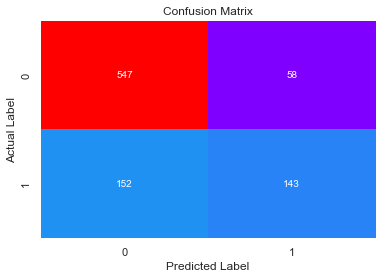

In [169]:
confusion_matrix(test_labels,ytest_predict_dt)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_dt),annot=True,fmt='d',cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label');
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

In [170]:
cart_test_accuracy=best_grid_dt.score(X_test,test_labels)
print(cart_test_accuracy)

0.7666666666666667


In [171]:
print(classification_report(test_labels,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [172]:
print('Test precision: ',0.71)
print('Test recall: ',0.48)
print('Test f1-score: ',0.58)
print('Test accuracy: ',0.77)

Test precision:  0.71
Test recall:  0.48
Test f1-score:  0.58
Test accuracy:  0.77


# Random Forest

AUC and ROC (performance)

Training data:

AUC: 0.868


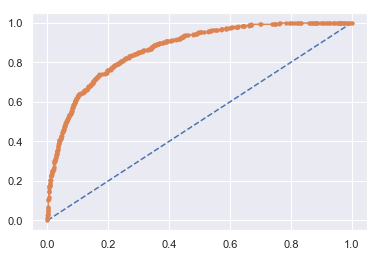

In [173]:
#probability of train data
probs=best_grid_rfcl.predict_proba(X_train)
#probabilities for positive outcome
probs=probs[:,1]
#calculate AUC
auc = roc_auc_score(train_lables, probs)
print('AUC: %.3f' % auc)
#calculate roc curve
rf_tr_fpr,rf_tr_tpr,rf_tr_thersholds=roc_curve(train_lables, probs)
plt.plot([0,1],[0,1],linestyle='--');
#plot the ROC curve
plt.plot(rf_tr_fpr,rf_tr_tpr,marker='.');

Testing data:

AUC: 0.822


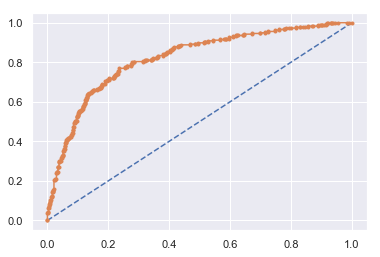

In [174]:
#probability of test data
probs=best_grid_rfcl.predict_proba(X_test)
#probabilities for positive outcome
probs=probs[:,1]
#calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
#calculate roc curve
rf_te_fpr,rf_te_tpr,rf_te_thersholds=roc_curve(test_labels, probs)
plt.plot([0,1],[0,1],linestyle='--');
#plot the ROC curve
plt.plot(rf_te_fpr,rf_te_tpr,marker='.');

Confusion matrix ,classification report and Accuracy

Training data:

Text(0.5,1,'Confusion Matrix')

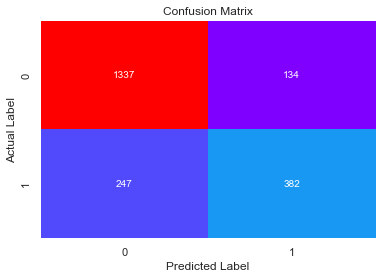

In [175]:
confusion_matrix(train_lables,ytrain_predict_rfcl)
sns.heatmap(confusion_matrix(train_lables,ytrain_predict_rfcl),annot=True,fmt='d',cbar=False,cmap='rainbow');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

In [176]:
rm_train_accuracy=best_grid_rfcl.score(X_train,train_lables)
print(rm_train_accuracy)

0.8185714285714286


In [179]:
print(classification_report(train_lables,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



Test data:

Text(0.5,1,'Confusion Matrix')

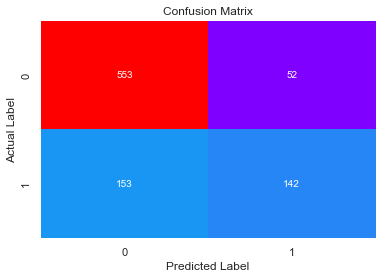

In [180]:
confusion_matrix(test_labels,ytest_predict_rfcl)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_rfcl),annot=True,fmt='d',cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

In [154]:
rm_test_accuracy=best_grid_rfcl.score(X_test,test_labels)
print(rm_test_accuracy)

0.7722222222222223


In [181]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [182]:
print('Test precision: ',0.73)
print('Test recall: ',0.48)
print('Test f1-score: ',0.58)
print('Test accuracy: ',0.77)

Test precision:  0.73
Test recall:  0.48
Test f1-score:  0.58
Test accuracy:  0.77


# Artificial Neural Network

AUC and ROC (performance)

Training data:

AUC: 0.818


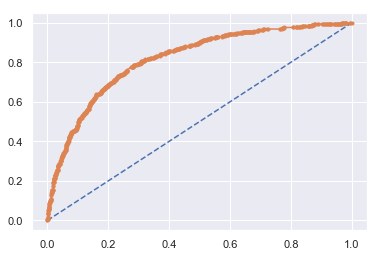

In [183]:
#probability of train data
probs=best_grid_ann.predict_proba(X_trains)
#probabilities for positive outcome
probs=probs[:,1]
#calculate AUC
auc = roc_auc_score(train_lables, probs)
print('AUC: %.3f' % auc)
#calculate roc curve
an_tr_fpr,an_tr_tpr,an_tr_thersholds=roc_curve(train_lables, probs)
plt.plot([0,1],[0,1],linestyle='--');
#plot the ROC curve
plt.plot(an_tr_fpr,an_tr_tpr,marker='.');

Testing data:

AUC: 0.807


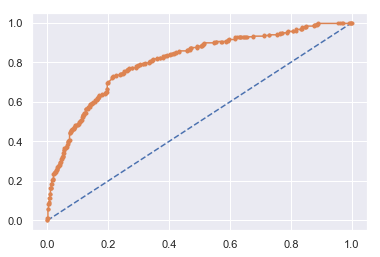

In [184]:
#probability of test data
probs=best_grid_ann.predict_proba(X_tests)
#probabilities for positive outcome
probs=probs[:,1]
#calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
#calculate roc curve
an_te_fpr,an_te_tpr,an_te_thersholds=roc_curve(test_labels, probs)
plt.plot([0,1],[0,1],linestyle='--');
#plot the ROC curve
plt.plot(an_te_fpr,an_te_tpr,marker='.');

Confusion matrix ,classification report and Accuracy

In [ ]:
Train data:

Text(0.5,1,'Confusion Matrix')

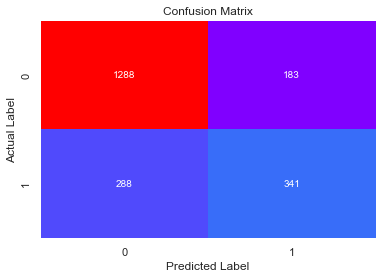

In [185]:
confusion_matrix(train_lables,ytrain_predict_ann)
sns.heatmap(confusion_matrix(train_lables,ytrain_predict_ann),annot=True,fmt='d',cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

In [186]:
Ann_train_accuracy=best_grid_ann.score(X_trains,train_lables)
print(Ann_train_accuracy)

0.7757142857142857


In [187]:
print(classification_report(train_lables,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1471
           1       0.65      0.54      0.59       629

    accuracy                           0.78      2100
   macro avg       0.73      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



Test data:

Text(0.5,1,'Confusion Matrix')

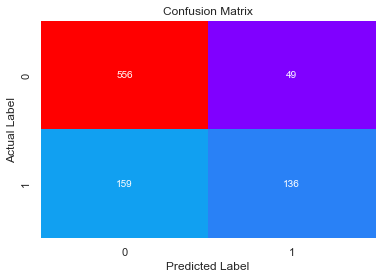

In [188]:
confusion_matrix(test_labels,ytest_predict_ann)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_ann),annot=True,fmt='d',cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

In [192]:
ann_test_accuracy=best_grid_ann.score(X_tests,test_labels)
print(ann_test_accuracy)

0.7688888888888888


In [193]:
print(classification_report(test_labels,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.74      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



In [167]:
print('Test precision: ',0.74)
print('Test recall: ',0.46)
print('Test f1-score: ',0.57)
print('Test accuracy: ',0.77)

Test precision:  0.74
Test recall:  0.46
Test f1-score:  0.57
Test accuracy:  0.77


# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


Training data:

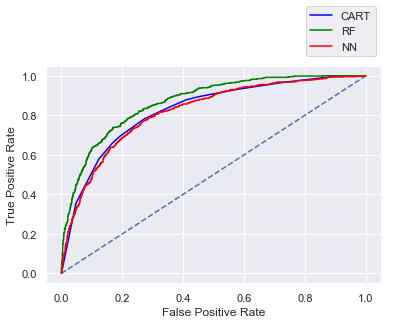

In [194]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_tr_fpr, dt_tr_tpr,color='blue',label="CART")
plt.plot(rf_tr_fpr,rf_tr_tpr,color='green',label="RF")
plt.plot(an_tr_fpr,an_tr_tpr,color='red',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Test data:

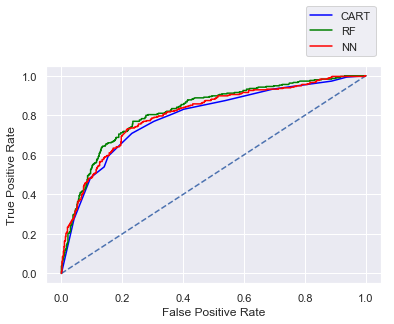

In [196]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_te_fpr, dt_te_tpr,color='blue',label="CART")
plt.plot(rf_te_fpr,rf_te_tpr,color='green',label="RF")
plt.plot(an_te_fpr,an_te_tpr,color='red',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

By looking at the curve, For training data Random Forest is good and for testing data all the model is looking almost similar but Random forest seems to be better.From the curve and from below analysis we will choose to have Random Forest as more preference

DT:

Test precision :  0.71

Test recall:  0.48

Test f1-score:  0.58

Test accuracy:  0.77

RF:

Test precision:  0.73

Test recall:  0.48

Test f1-score:  0.58

Test accuracy:  0.77

ANN:

Test precision:  0.74

Test recall:  0.46

Test f1-score:  0.57

Test accuracy:  0.77

In between Ann and DT, DT seems to give a more good model.

And in between RF and DT, all components are similar but in RF precesion rate is higher so will choose RF here.

RF has recall rate and f1-score is more in compare to ANN. 

Which concluding I will go for RF model.


# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations


•	Out of 4 Agency code JZI is having less sale. Need to do improvement on this agency.

•	Online channel is more popular could be because for any query, customer can reach out several times and easily accessible.Can see offline is too less even can say negligible, need to find out why. Is this because offline service is poor in compare to online or due to customer preference. Based on this can improve offline service.

•	Customised plan is more popular, and Gold is less. Is gold less because of expenses? Can do more research on this and provide more good packages inside Gold plan so that people will get excite for this too.

•	Asians destination seems to claimed more and Europe is very less. This is clearly because of huge expense on tour. Agencies can provide discount/offer on Europe tour by adjusting expense from Asia.
